# 0. SETUP

Place all the image into a new folder call "all". The file will generate a CSV for analysing it

In [1]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np

In [40]:
CSV_PATH = "workspace/annotations"
IMAGE_PATH = os.path.join("workspace", "images","all")

In [41]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df



In [42]:
def main():
    for folder in ['all']:
        image_path = os.path.join(os.getcwd(), (IMAGE_PATH))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv((CSV_PATH + "/"+ folder + '_labels.csv'), index=None)
        print('Successfully converted xml to csv.')


In [43]:
main()

Successfully converted xml to csv.


# 1. Saving the Data

In [94]:
# Randomize the sequence for training and testing
df = pd.read_csv(CSV_PATH + '/all_labels.csv').sample(frac=1).reset_index(drop=True)

df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_20210819_121445_2.jpg,812,609,wet syringe,346,160,579,475
1,IMG_6438.jpg,461,615,dirty plunger,129,128,301,614
2,syringe_tail (16).jpg,360,640,dry syringe,114,263,273,395
3,20210823_132341.jpg,493,370,dry syringe,108,2,247,324
4,20210823_132959.jpg,450,338,dry plunger,343,61,413,288
...,...,...,...,...,...,...,...,...
1565,20210824_141439.jpg,427,571,dirty syringe,137,115,282,510
1566,20210822_141152.jpg,652,489,dry plunger,161,122,581,303
1567,20210823_132417.jpg,438,329,dry syringe,210,31,436,275
1568,20210823_132042.jpg,452,340,dry syringe,183,56,279,322


In [95]:
import random

list_of_image = {}

for index, row in df.iterrows():
    d = row.to_dict()
    list_of_image[d["filename"]] = d["class"]

len(list_of_image)

1183

# 2. Analysing the Data

In [96]:
import matplotlib.pyplot as plt

label_class = {}

for index in list_of_image:
    category = list_of_image[index]

    if category not in label_class:
        label_class[category] = 1
    else:
        label_class[category] =  label_class[category] + 1

label_class

{'wet syringe': 226,
 'dirty plunger': 161,
 'dry syringe': 268,
 'dry plunger': 195,
 'dirty syringe': 229,
 'wet plunger': 104}

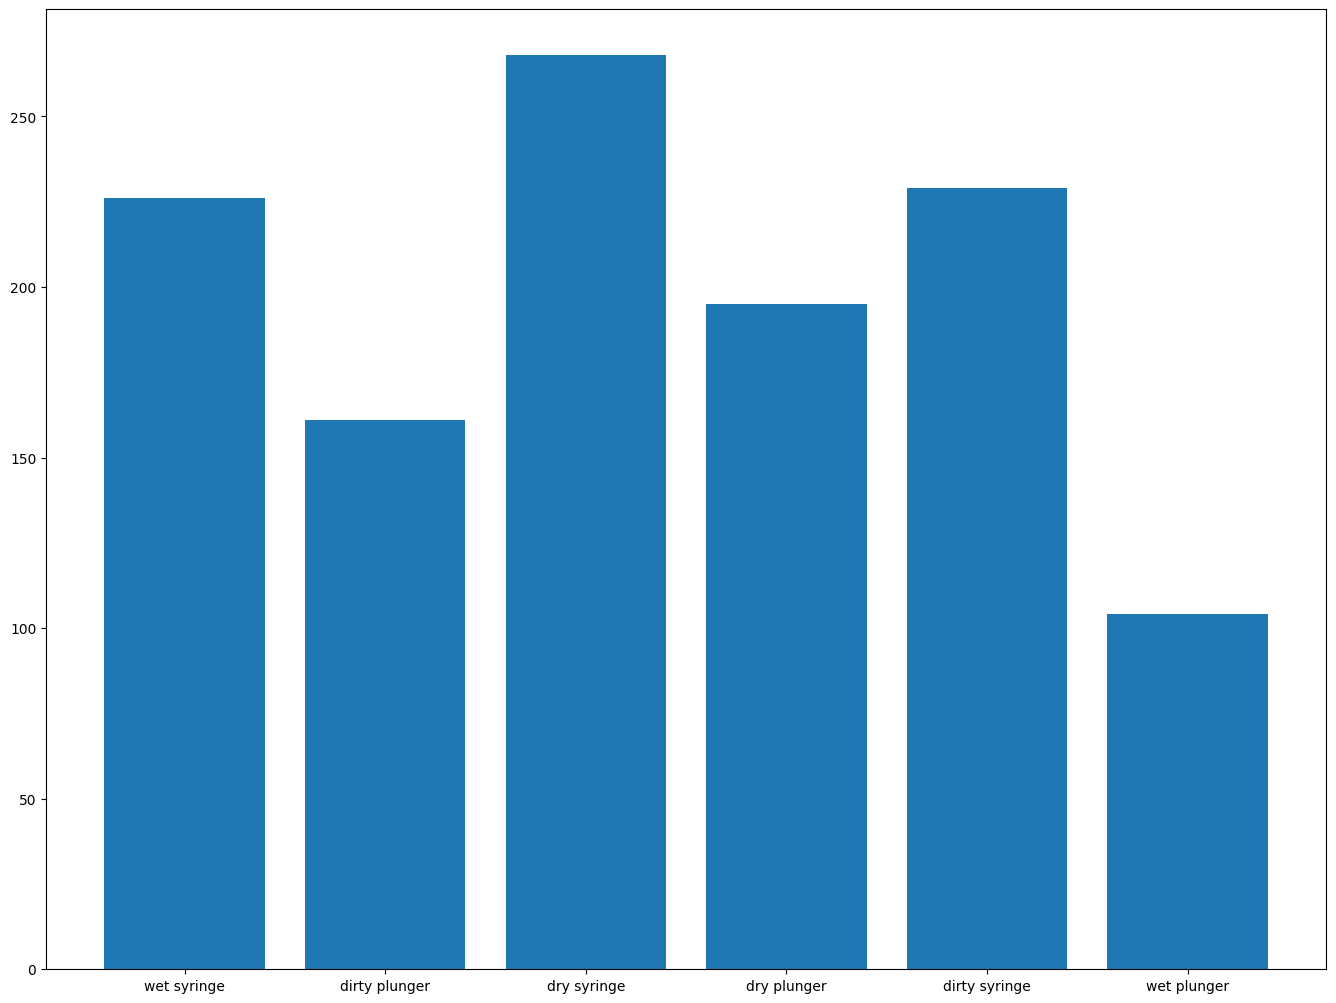

{'wet syringe': 226, 'dirty plunger': 161, 'dry syringe': 268, 'dry plunger': 195, 'dirty syringe': 229, 'wet plunger': 104}


In [97]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

category = list(label_class.keys())
value = list(label_class.values())

ax.bar(category,value)
plt.show()

print(label_class)

# 3. Split the image

In [98]:
TRAIN_FOLDER =  os.path.join(os.getcwd(), "workspace", "images", "train")
TEST_FOLDER =  os.path.join(os.getcwd(), "workspace", "images", "test")

!mkdir {TRAIN_FOLDER}
!mkdir {TEST_FOLDER}

#Total image to be taken and split accordingly
TOTAL_COUNT = 104



In [99]:
import re

# Add exception = ["moist plunger", "moist syringe"]

TRAIN_DATA = 0.8
exception = []

for _category in category:
    if _category not in exception:
        
        img_num = 0
        
        # Get the value
        if label_class[_category] < TOTAL_COUNT:
            total_num = label_class[_category]
            training_num = int(label_class[_category] * TRAIN_DATA)

        else:
            total_num = TOTAL_COUNT
            training_num =  int(TOTAL_COUNT * TRAIN_DATA)


        print(training_num)
        print(_category)
        

        for img_name in list_of_image:
            
            # Name of the image and retrieve the xml to store in to the directory respectively
            name = os.path.splitext(img_name)        

            img_file = os.path.join(os.getcwd(), IMAGE_PATH, img_name)
            xml_file = os.path.join(os.getcwd(), IMAGE_PATH, "{}.xml".format(name[0]))

            img_class = list_of_image[img_name]

            if img_class == _category:
                if img_num < training_num:
                    !copy "{img_file}" {TRAIN_FOLDER}
                    !copy "{xml_file}" {TRAIN_FOLDER}
                elif img_num <= total_num:
                    !copy "{img_file}" {TEST_FOLDER}
                    !copy "{xml_file}" {TEST_FOLDER}

                img_num = img_num + 1

            else:
                pass

        print("{} done with training image : {}, test image : {}".format(_category, training_num, int(total_num * 0.2)))


83
wet syringe
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copie

        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 fi

        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
dry syringe done with training image : 83, test image : 20
83
dry plunger
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s

        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 fi

        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
        1 file(s) copied.
wet plunger done with training image : 83, test image : 20
